# Assignment 3

Analyze the MACD, RSI and Stochastic chart prepared for last 6 months closing prices of the common stock of your assigned company with complete back testing and recommend BUY/SELL/HOLD for the stock. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import yfinance as yf

In [2]:
raw = yf.download('DABUR.NS',start='2020-01-01',end='2021-01-01')

raw.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,459.700012,460.799988,457.549988,459.799988,456.781677,495678
2020-01-02,459.799988,462.200012,458.000000,459.950012,456.930725,502422
2020-01-03,459.000000,460.700012,453.549988,455.600006,452.609283,1376230
2020-01-06,454.000000,456.450012,445.700012,448.000000,445.059174,1415568
2020-01-07,450.299988,456.000000,449.149994,453.500000,450.523041,966767


In [3]:
data = raw.copy()
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,487.257400,494.110203,480.070199,486.520000,484.185368,3.420313e+06
std,29.029941,26.835821,29.982023,28.362084,28.858558,1.642696e+06
min,392.149994,412.049988,386.049988,396.049988,393.450165,4.956780e+05
25%,468.125000,473.912498,460.424995,466.412498,463.350777,2.372306e+06
50%,493.949997,500.425003,487.274994,492.600006,490.552399,3.146716e+06
75%,510.000000,514.887512,503.049988,508.199997,506.228355,4.091768e+06
max,539.700012,540.500000,532.150024,539.549988,539.549988,1.080791e+07


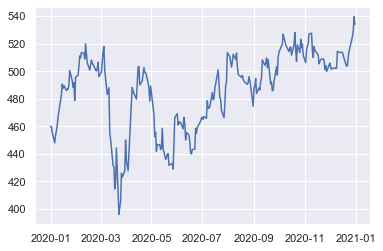

In [4]:
plt.plot(data['Close'])

# Moving Average Convergence Divergence (MACD) Line

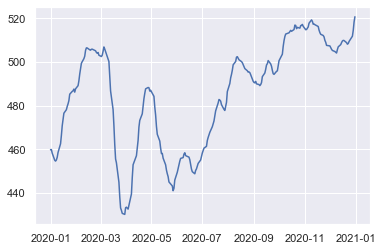

In [5]:
#plot for EMA lagged at 12

ema12 = data['Close'].ewm(span = 12).mean()
plt.plot(ema12)


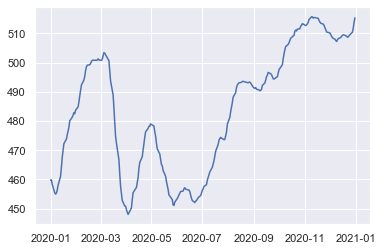

In [6]:
#plot for EMA lagged at 26
ema26 = data['Close'].ewm(span = 26).mean()
plt.plot(ema26)



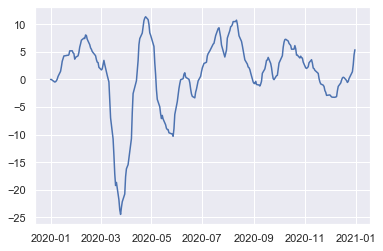

In [7]:
#MACD Plot

macd = ema12 - ema26

plt.plot(macd)



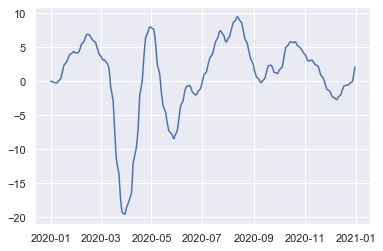

In [8]:
#EMA 9 of MACD = Signal Line

ema9 = macd.ewm(span = 9).mean()

plt.plot(ema9)

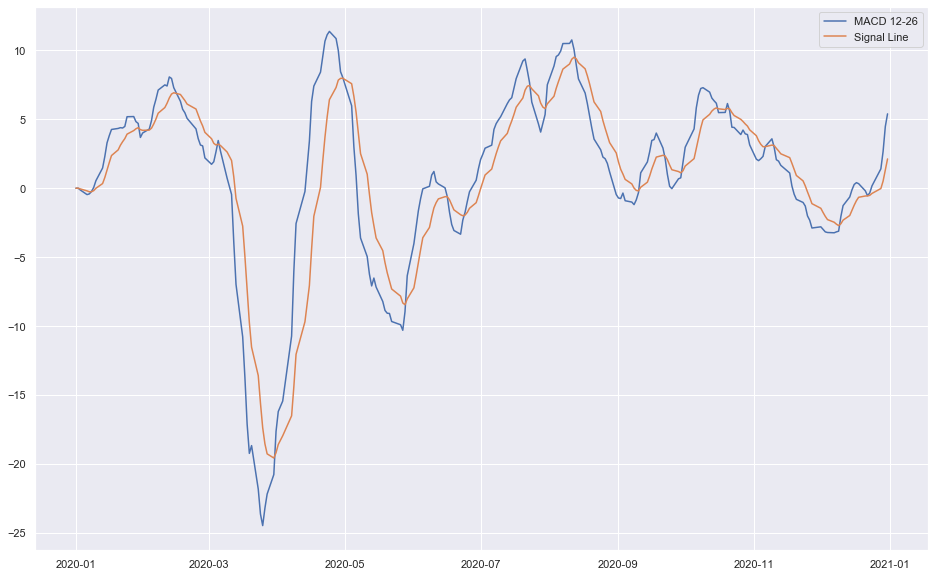

In [9]:
#comparison between MACD and Signal Line

plt.figure(figsize=(16,10))
plt.plot(macd, label = 'MACD 12-26')
plt.plot(ema9,label = 'Signal Line ')
plt.legend()
plt.show()

### Analysis of MACD Graph



MACD has crossed signal line in December 2020 and continues to stay above it into January 2021 . Recommend a BUY for this stock based on this.

# Relative Strength Index Chart

In [10]:
#RSI Chart uses a interval of 14 days
#need one set of data to contain only positive return values
#and the other to contain only absolute of negative return values
#then moving average both the ups and the downs and
#divide the ups by the downs
#and store the calculations according to formula in a new dataframe then plot it
spann = 14

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,459.700012,460.799988,457.549988,459.799988,456.781677,495678
2020-01-02,459.799988,462.200012,458.000000,459.950012,456.930725,502422
2020-01-03,459.000000,460.700012,453.549988,455.600006,452.609283,1376230
2020-01-06,454.000000,456.450012,445.700012,448.000000,445.059174,1415568
2020-01-07,450.299988,456.000000,449.149994,453.500000,450.523041,966767


In [12]:
data['Returns'] = data['Adj Close'].diff()/data['Adj Close']
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-01,459.700012,460.799988,457.549988,459.799988,456.781677,495678,NaN
2020-01-02,459.799988,462.200012,458.000000,459.950012,456.930725,502422,0.000326
2020-01-03,459.000000,460.700012,453.549988,455.600006,452.609283,1376230,-0.009548
2020-01-06,454.000000,456.450012,445.700012,448.000000,445.059174,1415568,-0.016964
2020-01-07,450.299988,456.000000,449.149994,453.500000,450.523041,966767,0.012128


In [13]:
#getting rid of the first nan value
data = data[1:]
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-02,459.799988,462.200012,458.000000,459.950012,456.930725,502422,0.000326
2020-01-03,459.000000,460.700012,453.549988,455.600006,452.609283,1376230,-0.009548
2020-01-06,454.000000,456.450012,445.700012,448.000000,445.059174,1415568,-0.016964
2020-01-07,450.299988,456.000000,449.149994,453.500000,450.523041,966767,0.012128
2020-01-08,449.799988,457.950012,446.600006,456.649994,453.652374,1291151,0.006898


In [14]:
ma_up,ma_down = data['Returns'].copy(),data['Returns'].copy()

In [15]:
ma_up[ma_up < 0] = 0
ma_down[ma_down>0] = 0

In [16]:
pd.DataFrame(ma_up)
pd.DataFrame(ma_down)

,Returns
Date,
2020-01-02,0.000000
2020-01-03,-0.009548
2020-01-06,-0.016964
2020-01-07,0.000000
2020-01-08,0.000000
...,...
2020-12-24,0.000000
2020-12-28,0.000000
2020-12-29,0.000000


                100
    RSI = 100 - --------
                 1 + RS

    RS = Average Gain / Average Loss

In [17]:
#RS
rs_up = ma_up.ewm(span = spann).mean()
rs_down = ma_down.abs().ewm(span = spann).mean()

RS = (1+(rs_up/rs_down))
RSI = 100-(100/RS)


RSI = pd.DataFrame(RSI)


In [18]:
RSI['lower'] = 30
RSI['Upper'] = 70
RSI.head()

,Returns,lower,Upper
Date,,,
2020-01-02,100.000000,30,70
2020-01-03,2.875742,30,70
2020-01-06,0.961414,30,70
2020-01-07,36.067565,30,70
2020-01-08,48.133459,30,70


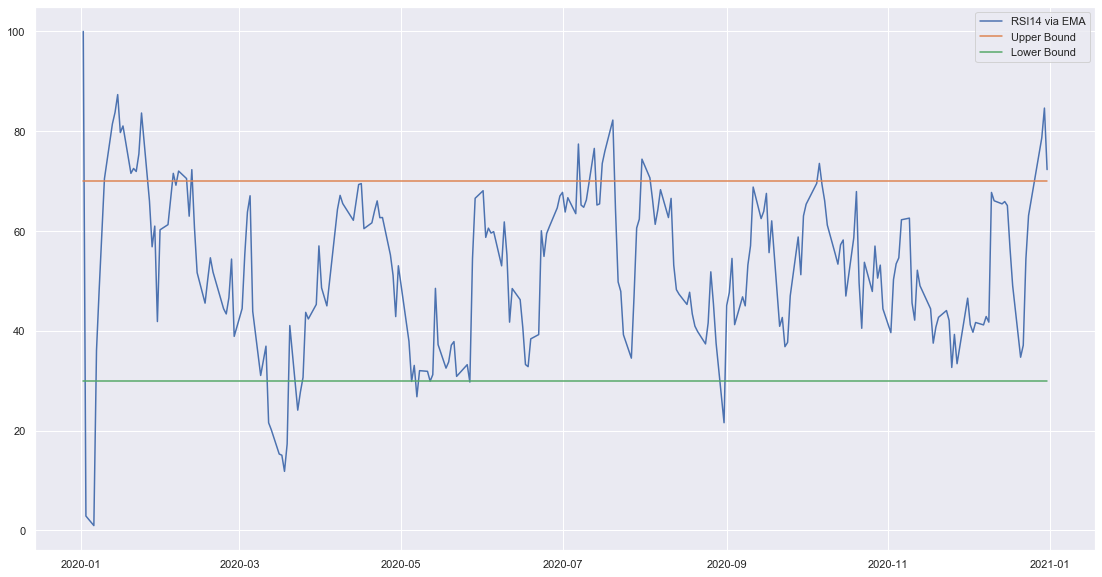

In [19]:
plt.figure(figsize =(19,10))
plt.plot(RSI['Returns'],label = 'RSI14 via EMA')
plt.plot(RSI['Upper'],label = "Upper Bound")
plt.plot(RSI['lower'],label = 'Lower Bound')
plt.legend()
plt.show()

### RSI Analysis

Currenly in the overbought stage. Recommend a SELL

# Stochastic Chart

 Formula

Stochastics is measured with the K line and the D line. But it is the D line that we follow closely, for it will indicate any major signals in the chart. Mathematically, the K line looks like this:

%K=100×CP−L14H14−L14where:CP=Most recent closing priceL14=Lowest price of the 14 previous trading sessionsH14=Highest price of the same 14 previous trading sessions\begin{aligned}&\% K=100\times\frac{CP-L14}{H14-L14}\\&\textbf{where:}\\&CP=\text{Most recent closing price}\\&L14=\text{Lowest price of the 14 previous trading sessions}\\&H14=\text{Highest price of the same 14 previous trading}\\&\qquad\quad\text{ \,sessions}\end{aligned}​%K=100×H14−L14

CP−L14​where:CP=Most recent closing priceL14=Lowest price of the 14 previous trading sessionsH14=Highest price of the same 14 previous trading sessions​﻿

The formula for the more important D line looks like this:

D=100(H3L3)where:H3=Highest of the three previous trading sessionsL3=Lowest price traded during the same three-day  period\begin{aligned}&\text{D} = 100\bigg(\frac{H3}{L3}\bigg) \\&\textbf{where:} \\&H3 = \text{Highest of the three previous trading sessions}\\&L3 = \text{Lowest price traded during the same three-day}\\&\qquad\text{ \, period}\end{aligned}​D=100(L3
H3​)where:H3=Highest of the three previous trading sessionsL3=Lowest price traded during the same three-day  period​



Source : https://www.investopedia.com/articles/technical/073001.asp

In [22]:
#Convenient library containing many financial functions

import ta

In [23]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-02,459.799988,462.200012,458.000000,459.950012,456.930725,502422,0.000326
2020-01-03,459.000000,460.700012,453.549988,455.600006,452.609283,1376230,-0.009548
2020-01-06,454.000000,456.450012,445.700012,448.000000,445.059174,1415568,-0.016964
2020-01-07,450.299988,456.000000,449.149994,453.500000,450.523041,966767,0.012128
2020-01-08,449.799988,457.950012,446.600006,456.649994,453.652374,1291151,0.006898


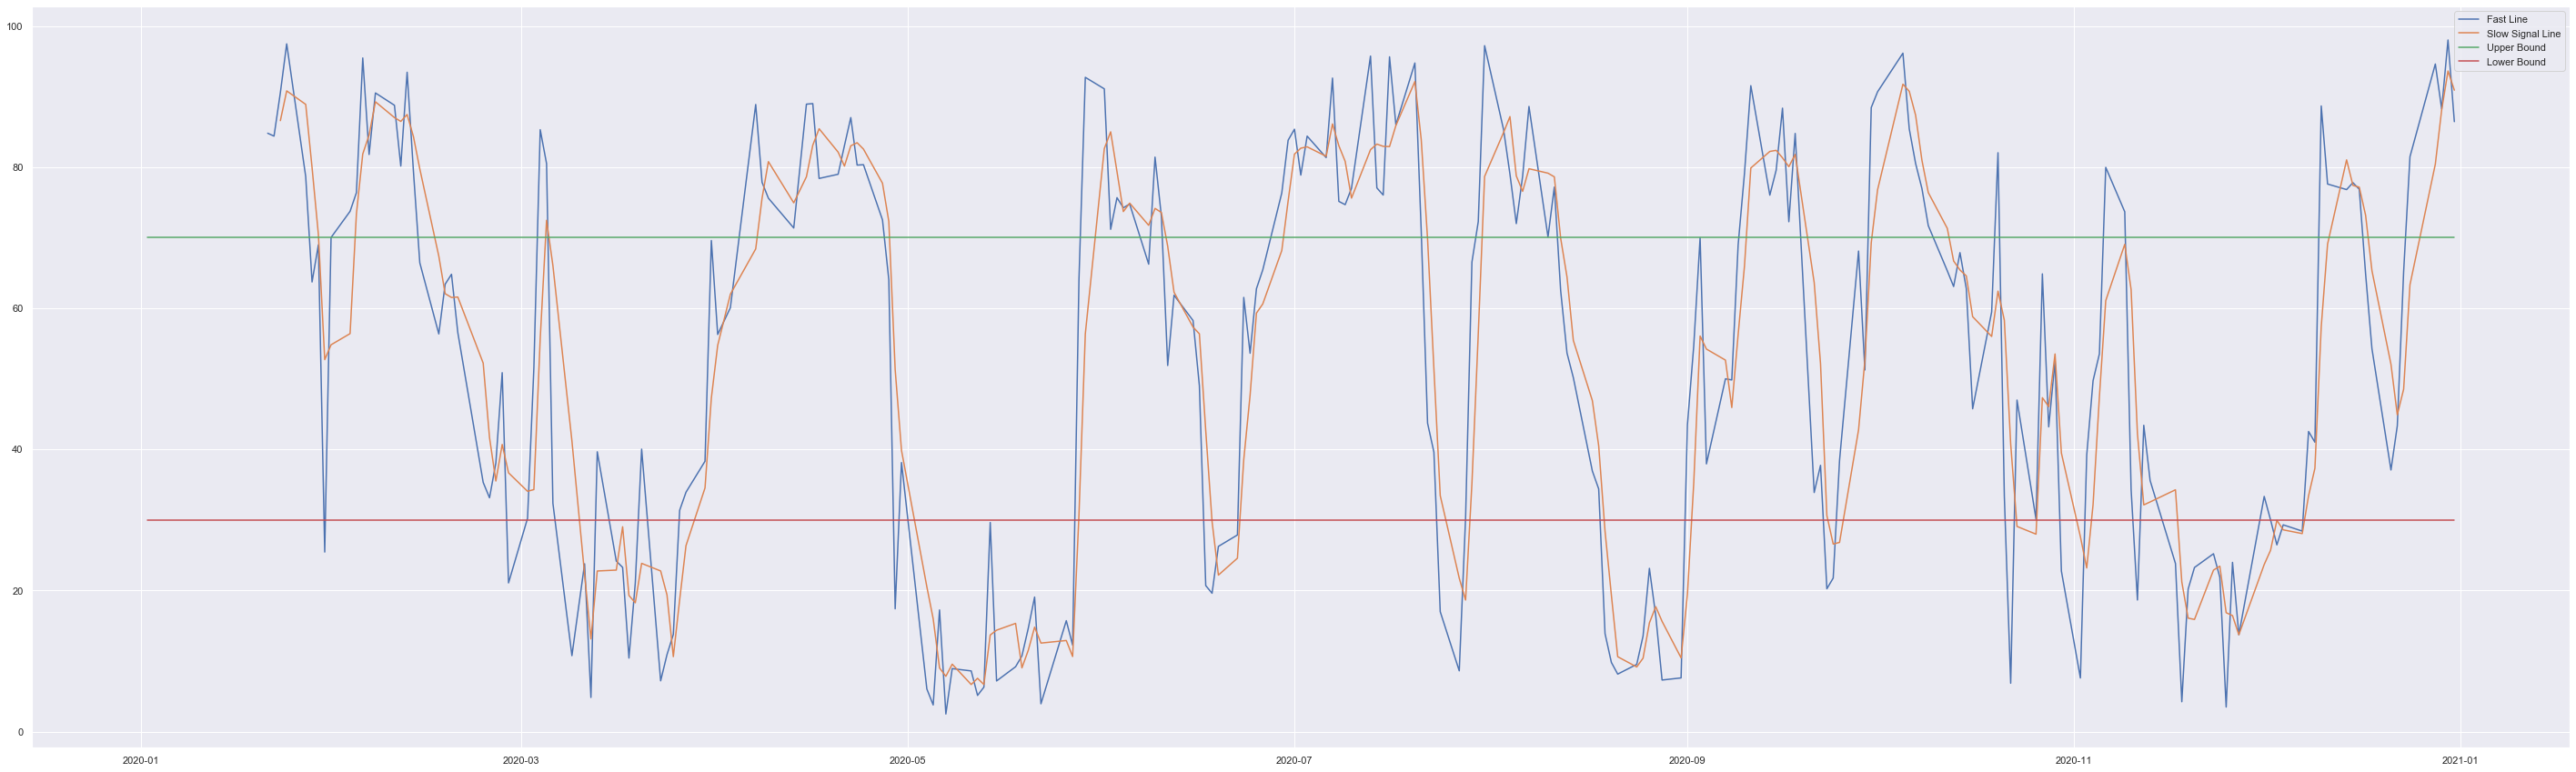

In [42]:
#stoch() and signal_stoch() method used to get both lines

sto = ta.momentum.StochasticOscillator(close = data['Close'],high = data['High'],low=data['Low'],window = 14,smooth_window=3)

plt.figure(figsize = (50,15))
plt.plot(sto.stoch(),label = 'Fast Line')
plt.plot(sto.stoch_signal(),label = 'Slow Signal Line')
plt.plot(RSI['Upper'],label = "Upper Bound")
plt.plot(RSI['lower'],label = 'Lower Bound')
plt.legend()
plt.show()

## Stochastic Chart Analysis

Both the signal line and the Fast line are in the overbought stage but the Fast Line has crossed the Slow line. Recommend a Hold.

Overall position: Hold it for a while and sell it if price drops for a few days in a row.